In [15]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import random
import keras

In [16]:
cifar_train=pd.read_csv('train_data.csv')
x_train=cifar_train.drop('label',axis=1).values
y_train=cifar_train['label'].values

print(x_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [17]:
cifar_test=pd.read_csv('test_data.csv')
x_test=cifar_test.drop('label',axis=1).values
y_test=cifar_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 3072)
(10000,)


In [18]:
x_train=x_train.reshape((-1,32*32*3))
x_train=x_train.astype('float32')/255.0

x_test=x_test.reshape((-1,32*32*3))
x_test=x_test.astype('float32')/255.0

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [19]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [20]:
model=Sequential()

model.add(Dense(128,input_shape=(32*32*3,),activation='relu'))
model.add(Dense(62,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dense_7 (Dense)             (None, 62)                7998      
                                                                 
 dense_8 (Dense)             (None, 10)                630       
                                                                 
Total params: 401972 (1.53 MB)
Trainable params: 401972 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#sgd=SGD()

sgd=SGD(0.01)
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
H=model.fit(x_train,y_train,epochs=11,batch_size=128,validation_data=(x_test,y_test))


Epoch 1/11
391/391 [==============================] - 10s 20ms/step - loss: 2.0190 - accuracy: 0.2765 - val_loss: 1.8835 - val_accuracy: 0.3371
Epoch 2/11
391/391 [==============================] - 6s 15ms/step - loss: 1.8466 - accuracy: 0.3462 - val_loss: 1.8069 - val_accuracy: 0.3597
Epoch 3/11
391/391 [==============================] - 6s 14ms/step - loss: 1.7792 - accuracy: 0.3751 - val_loss: 1.7451 - val_accuracy: 0.3900
Epoch 4/11
391/391 [==============================] - 6s 14ms/step - loss: 1.7319 - accuracy: 0.3919 - val_loss: 1.7105 - val_accuracy: 0.3997
Epoch 5/11
391/391 [==============================] - 6s 14ms/step - loss: 1.6921 - accuracy: 0.4059 - val_loss: 1.6986 - val_accuracy: 0.4070
Epoch 6/11
391/391 [==============================] - 6s 15ms/step - loss: 1.6601 - accuracy: 0.4180 - val_loss: 1.6370 - val_accuracy: 0.4259
Epoch 7/11
391/391 [==============================] - 6s 15ms/step - loss: 1.6309 - accuracy: 0.4272 - val_loss: 1.6395 - val_accuracy: 0.415

In [22]:
score=model.evaluate(x_test,y_test)
print("loss: ",score[0])
print("accuracy: ",score[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.5482 - accuracy: 0.4549
loss:  1.5481538772583008
accuracy:  0.45489999651908875


313/313 [==============================] - 1s 4ms/step
actual value:  0
Predicted value:  0


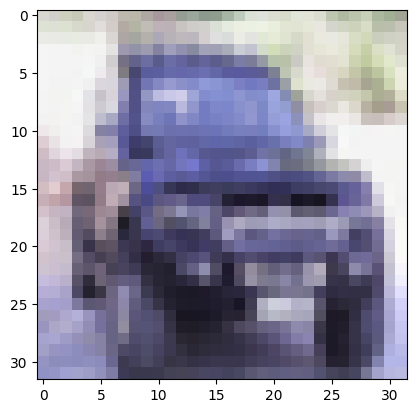

In [35]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

n=random.randint(0,9999)
plt.imshow(x_test[n].reshape((32,32,3)))

predictions=model.predict(x_test)

print("actual value: ",np.argmax(y_test[n]))
print("Predicted value: ",np.argmax(predictions[n]))